### 결정 경계와 데이터 포인트 시각화

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# make_blobs : 가상 클러스터를 생성하여 랜덤한 데이터셋 만들때 사용 (군집화데이터 혹은 그룹데이터)

#### 데이터 생성

In [2]:
x, y = make_blobs(n_samples=10000, centers=3, n_features=2, random_state=77)

x = torch.from_numpy(x).float()
y = torch.from_numpy(y).long()

#### 모델 정의

In [3]:
class SoftmaxRegression(nn.Module) :
    def __init__(self, input_size, num_classes) :
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x) :
        out = self.linear(x)
        return out

model = SoftmaxRegression(input_size=2, num_classes=3)    

#### Loss 함수 / 옵티마이저 정의

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [5]:
num_epochs = 1000 
for epoch in range(num_epochs) :
    # Forward pass
    output = model(x)
    loss = criterion(output, y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print
    if (epoch+1) % 100 == 0 :
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss : {loss.item():.4f}")



Epoch [100/1000], Loss : 0.0237
Epoch [200/1000], Loss : 0.0126
Epoch [300/1000], Loss : 0.0087
Epoch [400/1000], Loss : 0.0067
Epoch [500/1000], Loss : 0.0055
Epoch [600/1000], Loss : 0.0046
Epoch [700/1000], Loss : 0.0040
Epoch [800/1000], Loss : 0.0036
Epoch [900/1000], Loss : 0.0032
Epoch [1000/1000], Loss : 0.0030


c:\Users\Jay\anaconda3\envs\Pytorch\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


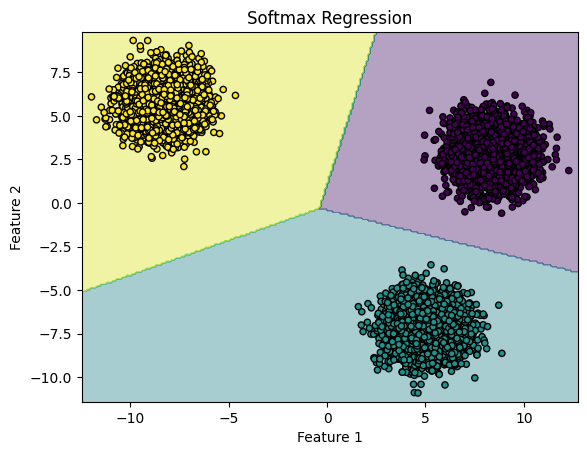

In [6]:
# Plot decision boundary
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1))
Z = model(torch.cat((xx.reshape(-1,1), yy.reshape(-1,1)), dim=1)).argmax(dim=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolors='k')
plt.title('Softmax Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()